# NCI Cryptocurrencies Project Machine Learning 

## Importing libraries that I will use

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go

### Load the data for each cryptocurrency. All the data for de csv files was obtained from https://coinmarketcap.com/

In [219]:
bitcoin_data = pd.read_csv('/Users/karina/Documents/NCI Cryptocurrencies Project/Data CSV Cryptocurrencies/Bitcoin_data.csv')
ethereum_data = pd.read_csv('/Users/karina/Documents/NCI Cryptocurrencies Project/Data CSV Cryptocurrencies/Ethereum_data.csv')
dogecoin_data = pd.read_csv('/Users/karina/Documents/NCI Cryptocurrencies Project/Data CSV Cryptocurrencies/Dogecoin_data.csv')
bnb_data = pd.read_csv('/Users/karina/Documents/NCI Cryptocurrencies Project/Data CSV Cryptocurrencies/BNB_data.csv')

# Bitcoin

In [220]:
bitcoin_data

Date        Open        High         Low       Close  \
0     Jul 09, 2024  $56,704.60  $58,239.20  $56,316.88  $58,009.23   
1     Jul 08, 2024  $55,849.57  $58,131.34  $54,321.02  $56,705.10   
2     Jul 07, 2024  $58,239.43  $58,371.12  $55,793.33  $55,849.11   
3     Jul 06, 2024  $56,659.08  $58,472.55  $56,038.96  $58,303.54   
4     Jul 05, 2024  $57,022.81  $57,497.15  $53,717.38  $56,662.37   
...            ...         ...         ...         ...         ...   
4086  may 02, 2013     $116.38     $125.60      $92.28     $105.21   
4087  may 01, 2013     $139.00     $139.89     $107.72     $116.99   
4088  Apr 30, 2013     $144.00     $146.93     $134.05     $139.00   
4089  Apr 29, 2013     $134.44     $147.49     $134.00     $144.54   
4090  Apr 28, 2013     $135.30     $135.98     $132.10     $134.21   

               Volume          Market Cap  
0     $27,849,512,607  $1,143,927,440,649  
1     $39,766,159,899  $1,118,206,962,401  
2     $20,553,359,505  $1,101,324,021,019  
3     $20,610,320,577  $1,149,721,701,454  
4     $55,417,544,033  $1,117,355,596,307  
...               ...                 ...  
4086               $0      $1,168,517,495  
4087               $0      $1,298,954,594  
4088               $0      $1,542,813,125  
4089               $0      $1,603,768,865  
4090               $0      $1,488,566,728  

[4091 rows x 7 columns]

## Explore the basic information and structure of the data.

In [221]:
#Check the fisrt few rows
bitcoin_data.head()

Date        Open        High         Low       Close  \
0  Jul 09, 2024  $56,704.60  $58,239.20  $56,316.88  $58,009.23   
1  Jul 08, 2024  $55,849.57  $58,131.34  $54,321.02  $56,705.10   
2  Jul 07, 2024  $58,239.43  $58,371.12  $55,793.33  $55,849.11   
3  Jul 06, 2024  $56,659.08  $58,472.55  $56,038.96  $58,303.54   
4  Jul 05, 2024  $57,022.81  $57,497.15  $53,717.38  $56,662.37   

            Volume          Market Cap  
0  $27,849,512,607  $1,143,927,440,649  
1  $39,766,159,899  $1,118,206,962,401  
2  $20,553,359,505  $1,101,324,021,019  
3  $20,610,320,577  $1,149,721,701,454  
4  $55,417,544,033  $1,117,355,596,307

In [222]:
#Check the last few rows
bitcoin_data.tail()

Date     Open     High      Low    Close Volume      Market Cap
4086  may 02, 2013  $116.38  $125.60   $92.28  $105.21     $0  $1,168,517,495
4087  may 01, 2013  $139.00  $139.89  $107.72  $116.99     $0  $1,298,954,594
4088  Apr 30, 2013  $144.00  $146.93  $134.05  $139.00     $0  $1,542,813,125
4089  Apr 29, 2013  $134.44  $147.49  $134.00  $144.54     $0  $1,603,768,865
4090  Apr 28, 2013  $135.30  $135.98  $132.10  $134.21     $0  $1,488,566,728

The DataFrame show some values in cero in the column 'volume' at the last rows, are represented with value '0'. In this analysis I will need some of this data, closing prices since 2013, this is the reason I'm not removing this rows.
I will expect 6 columns type float64 and 1 column type datetime64.

## Inspect the data

I will use the .info() to identify dtype mismatches in the DataFrame summary, see the content and the missing values.

In [223]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4091 entries, 0 to 4090
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        4091 non-null   object
 1   Open        4091 non-null   object
 2   High        4091 non-null   object
 3   Low         4091 non-null   object
 4   Close       4091 non-null   object
 5   Volume      4091 non-null   object
 6   Market Cap  4091 non-null   object
dtypes: object(7)
memory usage: 223.9+ KB


This Dataframe has 4091 entries, in other words has 4091 rows and 7 columns as I can see the dtypes are all object, this is one thing that I need to change, then I will be able to work with the data as I want to manipulate numbers, that will help to get some results in the analysis.

This DataFrame don't show any missing values, but I will use the na_values parameter to replace any missing values.

I will use parse_dates parameter to turn things into real datetime types. parse_dates takes a list of columns, in case you want to parse multiple columns into datetimes.

In [224]:
bitcoin_data = pd.read_csv('/Users/karina/Documents/NCI Cryptocurrencies Project/Data CSV Cryptocurrencies/Bitcoin_data.csv', na_values='n/a', parse_dates =['Date'])

In [225]:
bitcoin_data.head()

Date        Open        High         Low       Close           Volume  \
0 2024-07-09  $56,704.60  $58,239.20  $56,316.88  $58,009.23  $27,849,512,607   
1 2024-07-08  $55,849.57  $58,131.34  $54,321.02  $56,705.10  $39,766,159,899   
2 2024-07-07  $58,239.43  $58,371.12  $55,793.33  $55,849.11  $20,553,359,505   
3 2024-07-06  $56,659.08  $58,472.55  $56,038.96  $58,303.54  $20,610,320,577   
4 2024-07-05  $57,022.81  $57,497.15  $53,717.38  $56,662.37  $55,417,544,033   

           Market Cap  
0  $1,143,927,440,649  
1  $1,118,206,962,401  
2  $1,101,324,021,019  
3  $1,149,721,701,454  
4  $1,117,355,596,307

## Inspecting the data and changing dtypes.

In [226]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4091 entries, 0 to 4090
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4091 non-null   datetime64[ns]
 1   Open        4091 non-null   object        
 2   High        4091 non-null   object        
 3   Low         4091 non-null   object        
 4   Close       4091 non-null   object        
 5   Volume      4091 non-null   object        
 6   Market Cap  4091 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 223.9+ KB


## Define a custom function for checking missing values

In [227]:
def check_missing_values(df):
    if df.isnull().values.any():
        print("The dataframe contains missing values.")
    else:
        print("The dataframe does not contain any missing values.")

check_missing_values(bitcoin_data)

The dataframe does not contain any missing values.


I use the isnull() method to check for missing values in the dataframe. The values attribute returns a numpy array of boolean values indicating whether each element is missing or not.

I can see that using this parameters, na_values and parse_dates, the column Date has changed to dtype like datetime64.

I need to change the other 6 columns dtypes to float. 

Convert multiple columns by passing a list of column names to the astype method.

bitcoin_data[['Open', 'High','Low','Close','Volume','Market Cap']] = bitcoin_data[['Open', 'High','Low','Close','Volume','Market Cap']].astype(float)

This isn't working because there are non numeric symbols like '$' and ','.

## Removing the non-numeric characters from the columns

In [228]:
bitcoin_data['Open'] = bitcoin_data['Open'].str.replace('[^\d\.]', '', regex=True)
bitcoin_data['High'] = bitcoin_data['High'].str.replace('[^\d\.]', '', regex=True)
bitcoin_data['Low'] = bitcoin_data['Low'].str.replace('[^\d\.]', '', regex=True)
bitcoin_data['Close'] = bitcoin_data['Close'].str.replace('[^\d\.]', '', regex=True)
bitcoin_data['Volume'] = bitcoin_data['Volume'].str.replace('[^\d\.]', '', regex=True)
bitcoin_data['Market Cap'] = bitcoin_data['Market Cap'].str.replace('[^\d\.]', '', regex=True)

In [229]:
bitcoin_data.head()

Date      Open      High       Low     Close       Volume  \
0 2024-07-09  56704.60  58239.20  56316.88  58009.23  27849512607   
1 2024-07-08  55849.57  58131.34  54321.02  56705.10  39766159899   
2 2024-07-07  58239.43  58371.12  55793.33  55849.11  20553359505   
3 2024-07-06  56659.08  58472.55  56038.96  58303.54  20610320577   
4 2024-07-05  57022.81  57497.15  53717.38  56662.37  55417544033   

      Market Cap  
0  1143927440649  
1  1118206962401  
2  1101324021019  
3  1149721701454  
4  1117355596307

## Change the dtype of the 6 columns to float instead of object.

In [230]:
bitcoin_data[['Open', 'High','Low','Close','Volume','Market Cap']] = bitcoin_data[['Open', 'High','Low','Close','Volume','Market Cap']].astype(float)

In [231]:
# Inspect the data
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4091 entries, 0 to 4090
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4091 non-null   datetime64[ns]
 1   Open        4091 non-null   float64       
 2   High        4091 non-null   float64       
 3   Low         4091 non-null   float64       
 4   Close       4091 non-null   float64       
 5   Volume      4091 non-null   float64       
 6   Market Cap  4091 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 223.9 KB


I have 6 columns with dtype float64 and I have one column with datetime64 that represents the Dates.

This change will help if I want to compare different numbers to analize the prices sensibility.

## I create a Function to find duplicated Dates in the DataFrame. I will use this function in all the analysis of cryptocurrencies.

In [232]:
def check_duplicate_dates(df, date_column):
    # check for duplicates
    duplicates = df.duplicated(subset=[date_column])

    # get only the duplicated rows
    duplicated_rows = df[duplicates]

    # print out the duplicated row using the 'empty' attribute
    if duplicated_rows.empty:
        print("There are no duplicated dates.")
    else:
        print("The following rows have duplicated dates:")
        print(duplicated_rows)


check_duplicate_dates(bitcoin_data, 'Date')

There are no duplicated dates.


I use boolean indexing to get only the rows where duplicates is True. This gives me a new dataframe called duplicated_rows that contains only the rows with duplicated Date values.

## Indexing column 'Date'

In [233]:
bitcoin_data.set_index('Date', inplace=True)

Use the set_index() method to set the 'Date' column as the index of the DataFrame.

Use the inplace=True parameter to modify the DataFrame in place, no create a new one.

In [234]:
bitcoin_data.head()

Open      High       Low     Close        Volume    Market Cap
Date                                                                          
2024-07-09  56704.60  58239.20  56316.88  58009.23  2.784951e+10  1.143927e+12
2024-07-08  55849.57  58131.34  54321.02  56705.10  3.976616e+10  1.118207e+12
2024-07-07  58239.43  58371.12  55793.33  55849.11  2.055336e+10  1.101324e+12
2024-07-06  56659.08  58472.55  56038.96  58303.54  2.061032e+10  1.149722e+12
2024-07-05  57022.81  57497.15  53717.38  56662.37  5.541754e+10  1.117356e+12

In [235]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4091 entries, 2024-07-09 to 2013-04-28
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        4091 non-null   float64
 1   High        4091 non-null   float64
 2   Low         4091 non-null   float64
 3   Close       4091 non-null   float64
 4   Volume      4091 non-null   float64
 5   Market Cap  4091 non-null   float64
dtypes: float64(6)
memory usage: 223.7 KB


The DataFrame has a DatetimeIndex with 4091 entries, contain one row for each day of trading days. Starting on 09/07/2024 until 28/04/2013.
6 columns, the first 4 columns summarize the price distribution for the days, the first price, highest price, the lowest price, the close price and the last 2 columns represents the Volume and Market Cap.

## Sorting Dates

In [236]:
bitcoin_data_df = bitcoin_data.sort_values(by="Date", ascending=True)
bitcoin_data_df.head()

Open    High     Low   Close  Volume    Market Cap
Date                                                            
2013-04-28  135.30  135.98  132.10  134.21     0.0  1.488567e+09
2013-04-29  134.44  147.49  134.00  144.54     0.0  1.603769e+09
2013-04-30  144.00  146.93  134.05  139.00     0.0  1.542813e+09
2013-05-01  139.00  139.89  107.72  116.99     0.0  1.298955e+09
2013-05-02  116.38  125.60   92.28  105.21     0.0  1.168517e+09

The sort_values( ) function is used to sort by the values along either axis. In this case I use 2 parameters, by= that indicate the column reference, and ascending=True allow to get the sorting in ascending order.
### I have cleaned and ready the DataFrame for Bitcoin, I can start the analysis.

# Ethereum

In [237]:
ethereum_data = pd.read_csv('/Users/karina/Documents/NCI Cryptocurrencies Project/Data CSV Cryptocurrencies/Ethereum_data.csv', na_values='n/a', parse_dates =['Date'])
ethereum_data

Date       Open       High        Low      Close           Volume  \
0    2024-07-09  $3,018.80  $3,105.80  $3,005.52  $3,064.03  $15,269,945,822   
1    2024-07-08  $2,929.86  $3,090.66  $2,826.48  $3,018.73  $22,627,377,457   
2    2024-07-07  $3,067.41  $3,072.81  $2,923.96  $2,929.39  $10,857,947,538   
3    2024-07-06  $2,981.99  $3,080.11  $2,957.40  $3,069.38  $11,586,293,705   
4    2024-07-05  $3,057.83  $3,106.15  $2,826.01  $2,981.60  $31,131,942,647   
...         ...        ...        ...        ...        ...              ...   
3255 2015-08-11    $0.7081      $1.13    $0.6632      $1.07       $1,463,100   
3256 2015-08-10     $0.714    $0.7299    $0.6365    $0.7084         $405,283   
3257 2015-08-09    $0.7061    $0.8798    $0.6292    $0.7019         $532,170   
3258 2015-08-08      $2.79      $2.80    $0.7147    $0.7533         $674,188   
3259 2015-08-07      $2.83      $3.54      $2.52      $2.77         $164,329   

            Market Cap  
0     $368,312,672,689  
1     $362,860,880,689  
2     $352,114,562,457  
3     $368,934,230,992  
4     $358,378,765,284  
...                ...  
3255       $64,569,288  
3256       $42,818,364  
3257       $42,399,573  
3258       $45,486,894  
3259      $166,610,555  

[3260 rows x 7 columns]

I will use the parameters 'na_values' for missing values and parse_dates to change the column 'Date', Dtype from object to datetime64.

## Cleaning the data
## Display and Inspect the data

In [238]:
ethereum_data.head()

Date       Open       High        Low      Close           Volume  \
0 2024-07-09  $3,018.80  $3,105.80  $3,005.52  $3,064.03  $15,269,945,822   
1 2024-07-08  $2,929.86  $3,090.66  $2,826.48  $3,018.73  $22,627,377,457   
2 2024-07-07  $3,067.41  $3,072.81  $2,923.96  $2,929.39  $10,857,947,538   
3 2024-07-06  $2,981.99  $3,080.11  $2,957.40  $3,069.38  $11,586,293,705   
4 2024-07-05  $3,057.83  $3,106.15  $2,826.01  $2,981.60  $31,131,942,647   

         Market Cap  
0  $368,312,672,689  
1  $362,860,880,689  
2  $352,114,562,457  
3  $368,934,230,992  
4  $358,378,765,284

In [239]:
ethereum_data.tail()

Date     Open     High      Low    Close      Volume    Market Cap
3255 2015-08-11  $0.7081    $1.13  $0.6632    $1.07  $1,463,100   $64,569,288
3256 2015-08-10   $0.714  $0.7299  $0.6365  $0.7084    $405,283   $42,818,364
3257 2015-08-09  $0.7061  $0.8798  $0.6292  $0.7019    $532,170   $42,399,573
3258 2015-08-08    $2.79    $2.80  $0.7147  $0.7533    $674,188   $45,486,894
3259 2015-08-07    $2.83    $3.54    $2.52    $2.77    $164,329  $166,610,555

In [240]:
ethereum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3260 non-null   datetime64[ns]
 1   Open        3260 non-null   object        
 2   High        3260 non-null   object        
 3   Low         3260 non-null   object        
 4   Close       3260 non-null   object        
 5   Volume      3260 non-null   object        
 6   Market Cap  3260 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 178.4+ KB


I need to change the Dtype from object to float64 for the last 6 columns. I have 3260 entries(rows) and 7 columns. The columns names are Date, Open, High, Low, Close, Volume, Market Cap.

## Checking for missing values

In [241]:
# I will call my function for checking missing values
check_missing_values(ethereum_data)

The dataframe does not contain any missing values.


## Removing the non-numeric characters from the colums

In [242]:
ethereum_data['Open'] = ethereum_data['Open'].str.replace('[^\d\.]', '', regex=True)
ethereum_data['High'] = ethereum_data['High'].str.replace('[^\d\.]', '', regex=True)
ethereum_data['Low'] = ethereum_data['Low'].str.replace('[^\d\.]', '', regex=True)
ethereum_data['Close'] = ethereum_data['Close'].str.replace('[^\d\.]', '', regex=True)
ethereum_data['Volume'] = ethereum_data['Volume'].str.replace('[^\d\.]', '', regex=True)
ethereum_data['Market Cap'] = ethereum_data['Market Cap'].str.replace('[^\d\.]', '', regex=True)

In [243]:
ethereum_data.head()

Date     Open     High      Low    Close       Volume    Market Cap
0 2024-07-09  3018.80  3105.80  3005.52  3064.03  15269945822  368312672689
1 2024-07-08  2929.86  3090.66  2826.48  3018.73  22627377457  362860880689
2 2024-07-07  3067.41  3072.81  2923.96  2929.39  10857947538  352114562457
3 2024-07-06  2981.99  3080.11  2957.40  3069.38  11586293705  368934230992
4 2024-07-05  3057.83  3106.15  2826.01  2981.60  31131942647  358378765284

## Change the dtype from object to float64

In [244]:
ethereum_data[['Open', 'High','Low','Close','Volume','Market Cap']] = ethereum_data[['Open', 'High','Low','Close','Volume','Market Cap']].astype(float)

In [245]:
ethereum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3260 non-null   datetime64[ns]
 1   Open        3260 non-null   float64       
 2   High        3260 non-null   float64       
 3   Low         3260 non-null   float64       
 4   Close       3260 non-null   float64       
 5   Volume      3260 non-null   float64       
 6   Market Cap  3260 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 178.4 KB


## Function find duplicates Dates in the DataFrame.

In [246]:
check_duplicate_dates(ethereum_data, 'Date')

There are no duplicated dates.


## Indexing the column 'Date'

In [247]:
ethereum_data.set_index('Date', inplace=True)
ethereum_data.head()

Open     High      Low    Close        Volume    Market Cap
Date                                                                      
2024-07-09  3018.80  3105.80  3005.52  3064.03  1.526995e+10  3.683127e+11
2024-07-08  2929.86  3090.66  2826.48  3018.73  2.262738e+10  3.628609e+11
2024-07-07  3067.41  3072.81  2923.96  2929.39  1.085795e+10  3.521146e+11
2024-07-06  2981.99  3080.11  2957.40  3069.38  1.158629e+10  3.689342e+11
2024-07-05  3057.83  3106.15  2826.01  2981.60  3.113194e+10  3.583788e+11

In [248]:
ethereum_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3260 entries, 2024-07-09 to 2015-08-07
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        3260 non-null   float64
 1   High        3260 non-null   float64
 2   Low         3260 non-null   float64
 3   Close       3260 non-null   float64
 4   Volume      3260 non-null   float64
 5   Market Cap  3260 non-null   float64
dtypes: float64(6)
memory usage: 178.3 KB


Datetime Index = have 3260 entries(rows), the Dates are 09/07/2024 until 07/08/2015.

## Sorting by Date

In [249]:
ethereum_data_df = ethereum_data.sort_values(by="Date", ascending=True)
ethereum_data_df.head()

Open    High     Low   Close     Volume   Market Cap
Date                                                              
2015-08-07  2.8300  3.5400  2.5200  2.7700   164329.0  166610555.0
2015-08-08  2.7900  2.8000  0.7147  0.7533   674188.0   45486894.0
2015-08-09  0.7061  0.8798  0.6292  0.7019   532170.0   42399573.0
2015-08-10  0.7140  0.7299  0.6365  0.7084   405283.0   42818364.0
2015-08-11  0.7081  1.1300  0.6632  1.0700  1463100.0   64569288.0

### Ready Dataframe for Ethereum for start the analysis

## Importing data from CSV for BNB (Binance Coin)

Using the function read_csv() to import the data with 2 parameters, na_values for missing values and parse_dates to change the Dtype of the dates to datetime64.

In [250]:
bnb_data = pd.read_csv('/Users/karina/Documents/NCI Cryptocurrencies Project/Data CSV Cryptocurrencies/BNB_data.csv', na_values='n/a', parse_dates =['Date'])
bnb_data

Date     Open     High       Low    Close          Volume  \
0    2024-07-09  $510.54  $520.65   $507.27  $516.57  $1,586,240,513   
1    2024-07-08  $490.71  $523.16   $472.16  $510.61  $2,305,009,896   
2    2024-07-07  $527.44  $527.44   $488.96  $490.61  $1,660,301,909   
3    2024-07-06  $497.97  $530.45   $496.66  $527.67  $1,604,647,597   
4    2024-07-05  $513.61  $515.22   $456.92  $498.00  $2,865,780,557   
...         ...      ...      ...       ...      ...             ...   
2537 2017-07-29  $0.1048  $0.1113   $0.1011  $0.1078        $340,218   
2538 2017-07-28  $0.1076   $0.109   $0.1015  $0.1041        $342,568   
2539 2017-07-27  $0.1051  $0.1085   $0.1009  $0.1077        $344,499   
2540 2017-07-26  $0.1059   $0.109  $0.09927  $0.1051        $200,395   
2541 2017-07-25  $0.1152  $0.1158   $0.1015  $0.1059        $145,269   

           Market Cap  
0     $76,236,447,707  
1     $75,357,795,620  
2     $72,406,012,380  
3     $77,875,643,248  
4     $73,495,625,283  
...               ...  
2537      $10,781,100  
2538      $10,406,700  
2539      $10,773,700  
2540      $10,513,800  
2541      $10,587,000  

[2542 rows x 7 columns]

## Cleaning the data
## Display and Inspect

In [251]:
bnb_data.head()

Date     Open     High      Low    Close          Volume  \
0 2024-07-09  $510.54  $520.65  $507.27  $516.57  $1,586,240,513   
1 2024-07-08  $490.71  $523.16  $472.16  $510.61  $2,305,009,896   
2 2024-07-07  $527.44  $527.44  $488.96  $490.61  $1,660,301,909   
3 2024-07-06  $497.97  $530.45  $496.66  $527.67  $1,604,647,597   
4 2024-07-05  $513.61  $515.22  $456.92  $498.00  $2,865,780,557   

        Market Cap  
0  $76,236,447,707  
1  $75,357,795,620  
2  $72,406,012,380  
3  $77,875,643,248  
4  $73,495,625,283

In [252]:
bnb_data.tail()

Date     Open     High       Low    Close    Volume   Market Cap
2537 2017-07-29  $0.1048  $0.1113   $0.1011  $0.1078  $340,218  $10,781,100
2538 2017-07-28  $0.1076   $0.109   $0.1015  $0.1041  $342,568  $10,406,700
2539 2017-07-27  $0.1051  $0.1085   $0.1009  $0.1077  $344,499  $10,773,700
2540 2017-07-26  $0.1059   $0.109  $0.09927  $0.1051  $200,395  $10,513,800
2541 2017-07-25  $0.1152  $0.1158   $0.1015  $0.1059  $145,269  $10,587,000

In [253]:
bnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2542 non-null   datetime64[ns]
 1   Open        2542 non-null   object        
 2   High        2542 non-null   object        
 3   Low         2542 non-null   object        
 4   Close       2542 non-null   object        
 5   Volume      2542 non-null   object        
 6   Market Cap  2542 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 139.1+ KB


I have 2542 entries and 7 columns with the Date Dtype(datetime64) and I need to change the rest of the columns Data types to float to manipulate the data.

## Checking for missing values

In [254]:
check_missing_values(bnb_data)

The dataframe does not contain any missing values.


## Removing the non-numeric characters from the colums

In [255]:
bnb_data['Open'] = bnb_data['Open'].str.replace('[^\d\.]', '', regex=True)
bnb_data['High'] = bnb_data['High'].str.replace('[^\d\.]', '', regex=True)
bnb_data['Low'] = bnb_data['Low'].str.replace('[^\d\.]', '', regex=True)
bnb_data['Close'] = bnb_data['Close'].str.replace('[^\d\.]', '', regex=True)
bnb_data['Volume'] = bnb_data['Volume'].str.replace('[^\d\.]', '', regex=True)
bnb_data['Market Cap'] = bnb_data['Market Cap'].str.replace('[^\d\.]', '', regex=True)

In [256]:
bnb_data.head()

Date    Open    High     Low   Close      Volume   Market Cap
0 2024-07-09  510.54  520.65  507.27  516.57  1586240513  76236447707
1 2024-07-08  490.71  523.16  472.16  510.61  2305009896  75357795620
2 2024-07-07  527.44  527.44  488.96  490.61  1660301909  72406012380
3 2024-07-06  497.97  530.45  496.66  527.67  1604647597  77875643248
4 2024-07-05  513.61  515.22  456.92  498.00  2865780557  73495625283

## Change the dtype from object to float64

In [257]:
bnb_data[['Open', 'High','Low','Close','Volume','Market Cap']] = bnb_data[['Open', 'High','Low','Close','Volume','Market Cap']].astype(float)

In [258]:
bnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2542 non-null   datetime64[ns]
 1   Open        2542 non-null   float64       
 2   High        2542 non-null   float64       
 3   Low         2542 non-null   float64       
 4   Close       2542 non-null   float64       
 5   Volume      2542 non-null   float64       
 6   Market Cap  2542 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 139.1 KB


## Function find duplicates Dates.

In [259]:
check_duplicate_dates(bnb_data, 'Date')

There are no duplicated dates.


## Indexing the column 'Date'

In [260]:
bnb_data.set_index('Date', inplace=True)
bnb_data.head()

Open    High     Low   Close        Volume    Market Cap
Date                                                                  
2024-07-09  510.54  520.65  507.27  516.57  1.586241e+09  7.623645e+10
2024-07-08  490.71  523.16  472.16  510.61  2.305010e+09  7.535780e+10
2024-07-07  527.44  527.44  488.96  490.61  1.660302e+09  7.240601e+10
2024-07-06  497.97  530.45  496.66  527.67  1.604648e+09  7.787564e+10
2024-07-05  513.61  515.22  456.92  498.00  2.865781e+09  7.349563e+10

In [261]:
bnb_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2542 entries, 2024-07-09 to 2017-07-25
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2542 non-null   float64
 1   High        2542 non-null   float64
 2   Low         2542 non-null   float64
 3   Close       2542 non-null   float64
 4   Volume      2542 non-null   float64
 5   Market Cap  2542 non-null   float64
dtypes: float64(6)
memory usage: 139.0 KB


Datetime Index = 2542 entries(rows) and 6 columns, the dates are 09/07/2024 until 25/07/2017.

## Sorting by Date

In [262]:
bnb_data_df = bnb_data.sort_values(by="Date", ascending=True)
bnb_data_df.head()

Open    High      Low   Close    Volume  Market Cap
Date                                                             
2017-07-25  0.1152  0.1158  0.10150  0.1059  145269.0  10587000.0
2017-07-26  0.1059  0.1090  0.09927  0.1051  200395.0  10513800.0
2017-07-27  0.1051  0.1085  0.10090  0.1077  344499.0  10773700.0
2017-07-28  0.1076  0.1090  0.10150  0.1041  342568.0  10406700.0
2017-07-29  0.1048  0.1113  0.10110  0.1078  340218.0  10781100.0

## Cleaned and Ready Dataframe for BNB, start the analysis

## Dogecoin

Using the function read_csv() to import the data with 2 parameters, na_values for missing values and parse_dates to change the Dtype of the dates to datetime64.

In [263]:
dogecoin_data = pd.read_csv('/Users/karina/Documents/NCI Cryptocurrencies Project/Data CSV Cryptocurrencies/Dogecoin_data.csv', na_values='n/a', parse_dates =['Date'])
dogecoin_data

Date        Open        High         Low       Close  \
0    2024-07-09     $0.1076     $0.1092     $0.1061     $0.1075   
1    2024-07-08     $0.1042      $0.111    $0.09916     $0.1076   
2    2024-07-07     $0.1136     $0.1136     $0.1037     $0.1042   
3    2024-07-06     $0.1056     $0.1141     $0.1049     $0.1136   
4    2024-07-05     $0.1049     $0.1064    $0.09379     $0.1056   
...         ...         ...         ...         ...         ...   
3838 2014-01-05  $0.0003005  $0.0003121  $0.0002466  $0.0002707   
3839 2014-01-04  $0.0003046  $0.0003205   $0.000256  $0.0003008   
3840 2014-01-03  $0.0003533  $0.0003763  $0.0002926  $0.0003029   
3841 2014-01-02  $0.0004486  $0.0004486  $0.0003306  $0.0003531   
3842 2014-01-01  $0.0004228  $0.0004509  $0.0004228  $0.0004397   

              Volume       Market Cap  
0       $572,733,013  $15,594,849,517  
1     $1,023,119,021  $15,603,233,055  
2       $641,031,095  $15,116,005,319  
3       $842,720,114  $16,475,234,927  
4     $1,709,690,679  $15,310,742,077  
...              ...              ...  
3838        $245,107       $5,883,644  
3839        $313,907       $6,323,972  
3840        $303,106       $6,162,990  
3841        $318,037       $6,935,467  
3842        $307,917       $8,335,005  

[3843 rows x 7 columns]

## Cleaning the data. 
## Display and Inspect

In [264]:
dogecoin_data.head()

Date     Open     High       Low    Close          Volume  \
0 2024-07-09  $0.1076  $0.1092   $0.1061  $0.1075    $572,733,013   
1 2024-07-08  $0.1042   $0.111  $0.09916  $0.1076  $1,023,119,021   
2 2024-07-07  $0.1136  $0.1136   $0.1037  $0.1042    $641,031,095   
3 2024-07-06  $0.1056  $0.1141   $0.1049  $0.1136    $842,720,114   
4 2024-07-05  $0.1049  $0.1064  $0.09379  $0.1056  $1,709,690,679   

        Market Cap  
0  $15,594,849,517  
1  $15,603,233,055  
2  $15,116,005,319  
3  $16,475,234,927  
4  $15,310,742,077

In [265]:
dogecoin_data.tail()

Date        Open        High         Low       Close    Volume  \
3838 2014-01-05  $0.0003005  $0.0003121  $0.0002466  $0.0002707  $245,107   
3839 2014-01-04  $0.0003046  $0.0003205   $0.000256  $0.0003008  $313,907   
3840 2014-01-03  $0.0003533  $0.0003763  $0.0002926  $0.0003029  $303,106   
3841 2014-01-02  $0.0004486  $0.0004486  $0.0003306  $0.0003531  $318,037   
3842 2014-01-01  $0.0004228  $0.0004509  $0.0004228  $0.0004397  $307,917   

      Market Cap  
3838  $5,883,644  
3839  $6,323,972  
3840  $6,162,990  
3841  $6,935,467  
3842  $8,335,005

In [266]:
dogecoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3843 entries, 0 to 3842
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3843 non-null   datetime64[ns]
 1   Open        3843 non-null   object        
 2   High        3843 non-null   object        
 3   Low         3843 non-null   object        
 4   Close       3843 non-null   object        
 5   Volume      3843 non-null   object        
 6   Market Cap  3843 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 210.3+ KB


I have 3843 entries and 7 columns. The Date with the correct Dtype(datetime64) and I need to change the rest of the columns Data types.

## Checking missing values with my function

In [267]:
check_missing_values(dogecoin_data)

The dataframe does not contain any missing values.


## Removing the non-numeric characters

In [268]:
dogecoin_data['Open'] = dogecoin_data['Open'].str.replace('[^\d\.]', '', regex=True)
dogecoin_data['High'] = dogecoin_data['High'].str.replace('[^\d\.]', '', regex=True)
dogecoin_data['Low'] = dogecoin_data['Low'].str.replace('[^\d\.]', '', regex=True)
dogecoin_data['Close'] = dogecoin_data['Close'].str.replace('[^\d\.]', '', regex=True)
dogecoin_data['Volume'] = dogecoin_data['Volume'].str.replace('[^\d\.]', '', regex=True)
dogecoin_data['Market Cap'] = dogecoin_data['Market Cap'].str.replace('[^\d\.]', '', regex=True)

In [269]:
dogecoin_data.head()

Date    Open    High      Low   Close      Volume   Market Cap
0 2024-07-09  0.1076  0.1092   0.1061  0.1075   572733013  15594849517
1 2024-07-08  0.1042   0.111  0.09916  0.1076  1023119021  15603233055
2 2024-07-07  0.1136  0.1136   0.1037  0.1042   641031095  15116005319
3 2024-07-06  0.1056  0.1141   0.1049  0.1136   842720114  16475234927
4 2024-07-05  0.1049  0.1064  0.09379  0.1056  1709690679  15310742077

## Change the dtype from object to float64

In [270]:
dogecoin_data[['Open', 'High','Low','Close','Volume','Market Cap']] = dogecoin_data[['Open', 'High','Low','Close','Volume','Market Cap']].astype(float)

In [271]:
dogecoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3843 entries, 0 to 3842
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3843 non-null   datetime64[ns]
 1   Open        3843 non-null   float64       
 2   High        3843 non-null   float64       
 3   Low         3843 non-null   float64       
 4   Close       3843 non-null   float64       
 5   Volume      3843 non-null   float64       
 6   Market Cap  3843 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 210.3 KB


## Function find duplicated Dates in the DataFrame.

In [272]:
check_duplicate_dates(dogecoin_data, 'Date')

There are no duplicated dates.


## Indexing the column 'Date'

In [273]:
dogecoin_data.set_index('Date', inplace=True)
dogecoin_data.head()

Open    High      Low   Close        Volume    Market Cap
Date                                                                   
2024-07-09  0.1076  0.1092  0.10610  0.1075  5.727330e+08  1.559485e+10
2024-07-08  0.1042  0.1110  0.09916  0.1076  1.023119e+09  1.560323e+10
2024-07-07  0.1136  0.1136  0.10370  0.1042  6.410311e+08  1.511601e+10
2024-07-06  0.1056  0.1141  0.10490  0.1136  8.427201e+08  1.647523e+10
2024-07-05  0.1049  0.1064  0.09379  0.1056  1.709691e+09  1.531074e+10

Use the set_index() method to set the 'Date' column as the index of the DataFrame. Use the inplace=True parameter to modify the DataFrame in place, no creating a new one.

In [274]:
dogecoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3843 entries, 2024-07-09 to 2014-01-01
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        3843 non-null   float64
 1   High        3843 non-null   float64
 2   Low         3843 non-null   float64
 3   Close       3843 non-null   float64
 4   Volume      3843 non-null   float64
 5   Market Cap  3843 non-null   float64
dtypes: float64(6)
memory usage: 210.2 KB


DatetimeIndex with 3843 entries, dates 09/07/2024 to 01/01/2014. 6 columns have the correct data type float64 that will allow to work with the data.

## Sorting by Date

In [275]:
dogecoin_data_df = dogecoin_data.sort_values(by="Date", ascending=True)
dogecoin_data_df.head()

Open      High       Low     Close    Volume  Market Cap
Date                                                                    
2014-01-01  0.000423  0.000451  0.000423  0.000440  307917.0   8335005.0
2014-01-02  0.000449  0.000449  0.000331  0.000353  318037.0   6935467.0
2014-01-03  0.000353  0.000376  0.000293  0.000303  303106.0   6162990.0
2014-01-04  0.000305  0.000320  0.000256  0.000301  313907.0   6323972.0
2014-01-05  0.000300  0.000312  0.000247  0.000271  245107.0   5883644.0

## Cleaned and ready the DataFrame(Dogecoin) for start the analysis.

# EDA(Exploratory Data Analysis)

# Bitcoin Historical Analysis

I will start the analisis with the most important and famous cryptocurrency. Bitcoin, i want to show the progress through the years, how the price has changed being the most expensive cryptocurrency in the market at the moment.

In [276]:
bitcoin_data_df

Open      High       Low     Close        Volume    Market Cap
Date                                                                          
2013-04-28    135.30    135.98    132.10    134.21  0.000000e+00  1.488567e+09
2013-04-29    134.44    147.49    134.00    144.54  0.000000e+00  1.603769e+09
2013-04-30    144.00    146.93    134.05    139.00  0.000000e+00  1.542813e+09
2013-05-01    139.00    139.89    107.72    116.99  0.000000e+00  1.298955e+09
2013-05-02    116.38    125.60     92.28    105.21  0.000000e+00  1.168517e+09
...              ...       ...       ...       ...           ...           ...
2024-07-05  57022.81  57497.15  53717.38  56662.37  5.541754e+10  1.117356e+12
2024-07-06  56659.08  58472.55  56038.96  58303.54  2.061032e+10  1.149722e+12
2024-07-07  58239.43  58371.12  55793.33  55849.11  2.055336e+10  1.101324e+12
2024-07-08  55849.57  58131.34  54321.02  56705.10  3.976616e+10  1.118207e+12
2024-07-09  56704.60  58239.20  56316.88  58009.23  2.784951e+10  1.143927e+12

[4091 rows x 6 columns]

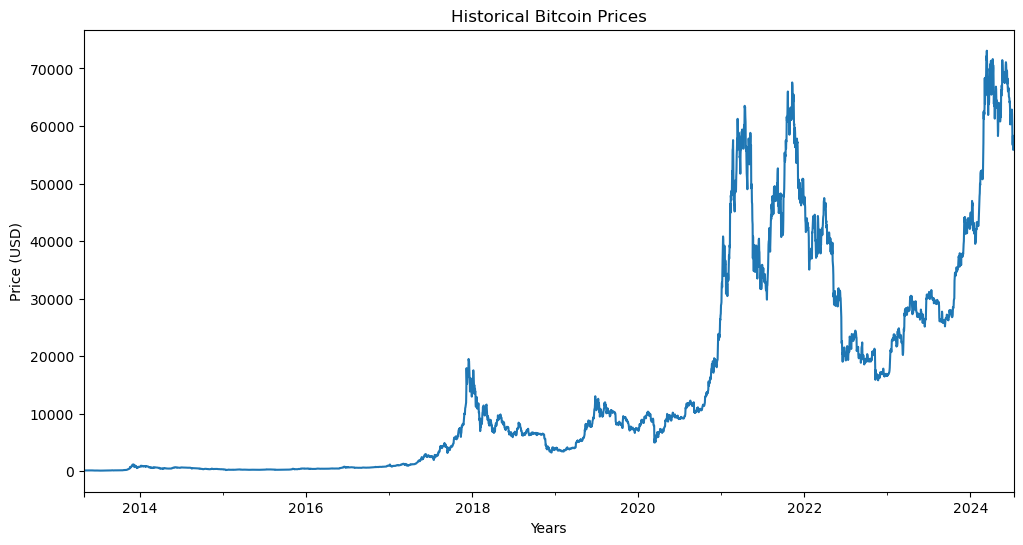

In [277]:
bitcoin_data_df['Close'].plot(figsize=(12,6))
plt.title("Historical Bitcoin Prices")
plt.xlabel('Years')
plt.ylabel('Price (USD)')
plt.show()

The graphic shows the historical prices of Bitcoin from 2014 to 2024, plotted on a line graph. The y-axis represents the price in USD, ranging from 0 to 70,000, and the x-axis represents the years. From 2014 until around mid-2017, Bitcoin prices were relatively stable and low, generally under 10,000 USD. The first significant spike occurs at the end of 2017, where prices peak close to 20,000 USD. After a drop and a period of fluctuation, prices start to rise significantly around 2020, reaching an all-time high of nearly 70,000 USD in late 2021. Following this peak, there's a sharp decline and subsequent volatility with prices making several swings between approximately 20,000 and 60,000 USD until mid-2023. The graph ends with a rising trend as approach 2024.

When I made this graphic, I realize that will be very useful to have a dynamic graphic were we can see the prices through the years and we can have a better overview that was is happening with the prices up and down during the years, then I learned how to use the library called plotly. This library can make dynamic graphics that help you see the data better for analysis, an compare important points.

Start, install the libraries !pip install plotly and !pip install cufflinks.

Once we have installed this libraries, import the libraries.

In [278]:
import cufflinks as cf
from IPython.display import display,HTML

cf.set_config_file(sharing='public', theme='ggplot', offline=True)

In [279]:
bitcoin_data_df['Close'].iplot(kind='line', xTitle='Years', yTitle='Price (USD)', title='Historical Bitcoin Prices')

On December 2017 we have a huge raise in price, starting the year on January with 777.76 and finish the year on December with 19,497.40. The price is 25 times higher in only some months. As we can see if the inversionist bought Bitcoin during 2014,2015 or 2016; on 2017 they will have a lot of profit as the price grows 25 times, the best scenario until now, is selling on December 2017. On 2018 the price when down finishing december with 3,252.84, in this case they can buy as the price is going down and will expect to go up again in the next years. On the 2021 was the best time to sell the Bitcoin as the price raise until 67,000 on November and 64,000 in April, was the time when the value of Bitcoin raise high levels. In March 2024 Bitcoin price raise until 73,083. this is the highest price in all this 6 years.

In [280]:
bitcoin_data_df['Market Cap'].iplot(kind='line', xTitle='Years', yTitle='Market Cap', title='Market Capitalization BTC')

This graphic displays the market capitalization of Bitcoin from 2014 to 2024. The y-axis represents market capitalization in trillions of USD, with labels from 0 to 1.4 trillion, while the x-axis shows the years.

From 2014 until early 2017, Bitcoin's market capitalization was relatively low, hovering around or below 0.2 trillion USD. There's a noticeable surge at the end of 2017, peaking just below 0.8 trillion USD. Following this peak, the market cap experiences significant fluctuations, with a gradual increase from late 2019.

A sharp rise begins around 2020, with the market cap reaching its highest point of nearly 1.4 trillion USD in early 2021. After reaching this peak, there is a sharp decline followed by high volatility, with several peaks and troughs. As we approach 2024, the market capitalization appears to be in an upward trend, though still experiencing some fluctuations.

## Analysis of the 4 Cryptocurrencies based in the closed price. Bitcoin,Ethereum,BNB and Dogecoin.

Create a Dataframe that contains the closing price of all 4 cryptocurrencies.

As I have different starting dates for each cryptocurrency, I decide to filter the dataframe to take the dates since 01-08-2017 to 09-07-2024 for all the cryptocurrencies. The date column is the index of the dataframe, I will use the .loc[] function in pandas to filter the dataframe based on the index values.

In [281]:
prices = pd.DataFrame ({'BTC-USD': bitcoin_data_df['Close'],'ETH-USD':ethereum_data_df['Close'],'BNB-USD': bnb_data_df['Close'],'DOGE-USD': dogecoin_data_df['Close']})

In [282]:
# filter dataframe for dates between '2017-08-01' and '2024-07-09'
start_date = pd.to_datetime('2017-08-01')
end_date = pd.to_datetime('2024-07-09')
closedprices = prices.loc[start_date:end_date]
closedprices

BTC-USD  ETH-USD    BNB-USD  DOGE-USD
Date                                              
2017-08-01   2718.26   226.77    0.09987  0.001792
2017-08-02   2710.67   219.95    0.10050  0.001788
2017-08-03   2804.73   225.34    0.10660  0.001795
2017-08-04   2895.89   223.07    0.10750  0.001820
2017-08-05   3252.91   256.51    0.12890  0.002087
...              ...      ...        ...       ...
2024-07-05  56662.37  2981.60  498.00000  0.105600
2024-07-06  58303.54  3069.38  527.67000  0.113600
2024-07-07  55849.11  2929.39  490.61000  0.104200
2024-07-08  56705.10  3018.73  510.61000  0.107600
2024-07-09  58009.23  3064.03  516.57000  0.107500

[2535 rows x 4 columns]

In [283]:
closedprices.iplot(kind='line', xTitle='Years', yTitle='Price', title='Closed Prices of 4 Cryptocurrencies 2018-2024')

Bitcoin (BTC-USD) - Red Line: Bitcoin’s price shows the highest volatility and the highest values on the graph. Starting at a moderate level in 2018, it spikes sharply around late 2020 and early 2021, reaching upwards of 60,000. The price then exhibits significant fluctuations, with a major drop around mid-2021 followed by recovery and more fluctuations, peaking close to 70,000. Towards 2024, the graph shows another rising trend.

Ethereum (ETH-USD) - Black Line: Ethereum’s price trend is less volatile compared to Bitcoin but follows a similar pattern. It starts at a lower price point, remains relatively flat with some minor peaks until late 2020, then rises sharply, reaching higher values through 2021. After some peaks and troughs, it appears to stabilize somewhat as it approaches 2024, albeit at a higher price than it started in 2018.

Binance Coin (BNB-USD) - Blue Line: Binance Coin displays a more steady increase compared to the previous two. Starting very low, it gradually increases and shows a more controlled ascent post-2020, with fewer fluctuations than Bitcoin and Ethereum, and stabilizes at a moderate level by 2024.

Dogecoin (DOGE-USD) - Orange Line: Dogecoin’s price remains consistently low compared to the other three cryptocurrencies throughout the period, with minimal fluctuations and a generally flat line close to the bottom of the graph.

The graph illustrates the varied price behaviors of these cryptocurrencies, highlighting the dramatic rises and falls characteristic of digital currency markets. Bitcoin and Ethereum show the highest peaks, while BNB and Dogecoin exhibit more modest price movements.


The cryptocurrencies have different scales then the first plot doesn't give us to much information about the behavior of the last 3 cryptocurrencies with the price that is less, compare with Bitcoin that is the most common and expensive cryptocurrency in the market at the moment. As this plot doesn't take the different scales into account, I will re-scale the prices to see better the different fluctuations of each cryptocurrency, all together in one graphic.

## Re-scale the prices to see better the different fluctuations of each cryptocurrency, all together in one graphic.

In [284]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled = min_max_scaler.fit_transform(closedprices)
scaled

array([[1.07854125e-02, 3.01325358e+00, 0.00000000e+00, 1.51569020e-01],
       [0.00000000e+00, 2.86899983e+00, 8.86874099e-05, 1.50984263e-01],
       [1.33659539e-01, 2.98300682e+00, 9.47406775e-04, 1.52007588e-01],
       ...,
       [7.55098807e+01, 6.01779271e+01, 6.90509094e+01, 1.51225183e+01],
       [7.67262451e+01, 6.20676089e+01, 7.18663828e+01, 1.56195618e+01],
       [7.85794177e+01, 6.30257753e+01, 7.27053938e+01, 1.56049428e+01]])

In [285]:
#Convert into a dataframe
scaled_df = pd.DataFrame(scaled,columns = closedprices.columns)
scaled_df

BTC-USD    ETH-USD    BNB-USD   DOGE-USD
0      0.010785   3.013254   0.000000   0.151569
1      0.000000   2.869000   0.000089   0.150984
2      0.133660   2.983007   0.000947   0.152008
3      0.263198   2.934993   0.001074   0.155662
4      0.770525   3.642301   0.004087   0.194695
...         ...        ...        ...        ...
2530  76.665526  61.282251  70.091227  15.327183
2531  78.997633  63.138936  74.267982  16.496697
2532  75.509881  60.177927  69.050909  15.122518
2533  76.726245  62.067609  71.866383  15.619562
2534  78.579418  63.025775  72.705394  15.604943

[2535 rows x 4 columns]

I use the MinMaxScaler class from the preprocessing module of scikit-learn to scale the values of the dataset to a specified range.

preprocessing.MinMaxScaler() creates a new MinMaxScaler object that will be used to scale the data.

feature_range=(0,100) sets the range to which the data will be scaled. In this case, it will be scaled to the range of 0 to 100.

min_max_scaler.fit_transform(closedprices) applies the scaling to the closedprices dataset. The fit_transform() method fits the scaler to the data and then transforms it.

The scaled data is stored in the scaled variable.

## Plot scaled_df

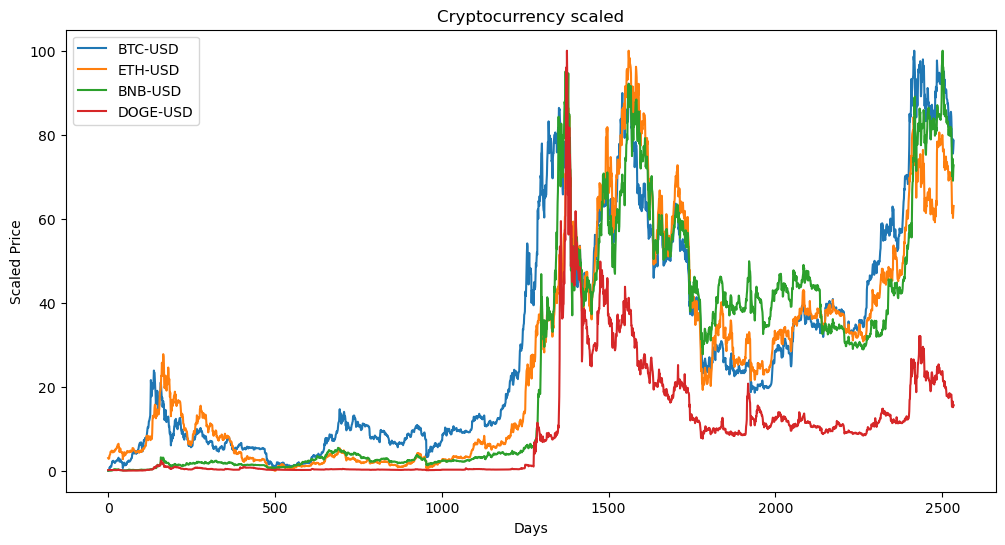

In [286]:
scaled_df.plot(figsize=(12,6), title = "Cryptocurrency scaled", xlabel = "Days", ylabel= "Scaled Price")
plt.show()

This graphic illustrates the scaled prices of four cryptocurrencies over a time span of approximately 2500 days. Each cryptocurrency's price is scaled to allow for direct comparison of their price movements over time.

Bitcoin (BTC-USD) - Red Line: Bitcoin’s scaled price line shows the highest peaks and valleys across the timeline, indicative of its higher volatility and significant price changes.

Ethereum (ETH-USD) - Blue Line: Ethereum follows a pattern somewhat similar to Bitcoin but with less extreme peaks, reflecting its generally lower but still substantial price movements.

Binance Coin (BNB-USD) - Green Line: Binance Coin demonstrates moderate volatility compared to Bitcoin and Ethereum, with a somewhat stable rise and less severe fluctuations.

Dogecoin (DOGE-USD) - Orange Line: Dogecoin exhibits the lowest volatility and generally lower scaled price levels across the entire period, staying much closer to the base of the graph.

The graphic effectively illustrates the relative stability and volatility of these currencies when their prices are adjusted to a common scale, highlighting the drastic differences in price movements between them over the observed period.

The cryptocurrencies have a correlation, when the prices drops in one cryptocurrency the others prices in the other cryptocurrencies drops as well and when the prices rises the other prices from the other cryptocurrencies rises as well.

## Cryptocurrency prices over the last 6 years.

## Plotting prices for each cryptocurrency in subplots (separately) then I can see the patterns correctly.

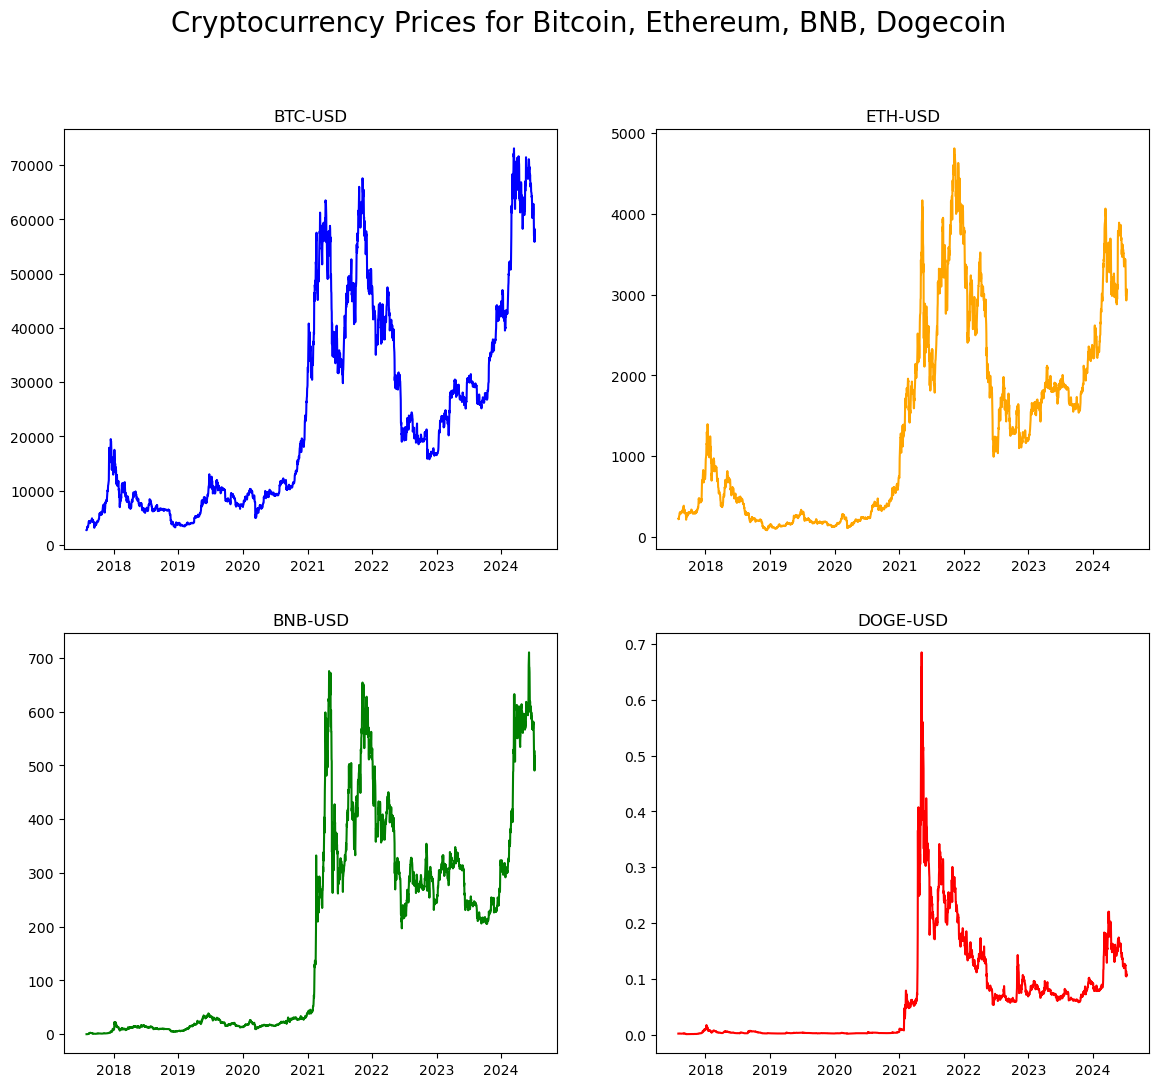

In [287]:
# define a list of colors for each cryptocurrency
colors = ['blue', 'orange', 'green', 'red']

# create a figure with 5 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# loop through the subplots and plot each cryptocurrency with a different color
for i, (name, col) in enumerate(closedprices.iteritems()):
    row = i // 2
    col_idx = i % 2
    axs[row, col_idx].plot(col.index, col.values, color=colors[i])
    axs[row, col_idx].set_title(name)

# title
fig.suptitle('Cryptocurrency Prices for Bitcoin, Ethereum, BNB, Dogecoin', fontsize=20)

plt.show()

## Statistics

In [288]:
closedprices.describe()

BTC-USD      ETH-USD      BNB-USD     DOGE-USD
count   2535.000000  2535.000000  2535.000000  2535.000000
mean   23735.383120  1344.894276   184.715929     0.065833
std    18620.413282  1192.883043   192.134601     0.088416
min     2710.670000    84.310000     0.099870     0.000755
25%     8199.165000   251.340000    15.190000     0.002653
50%    17815.650000  1144.580000    42.400000     0.011680
75%    37271.895000  2023.965000   312.900000     0.086495
max    73083.500000  4812.090000   710.460000     0.684800

I have 2535 rows of Data.
All of this statistics come from August '2017' until July '2024'.

The statistics represent a summary of the closing prices for four cryptocurrencies—Bitcoin (BTC-USD), Ethereum (ETH-USD), Binance Coin (BNB-USD), and Dogecoin (DOGE-USD)—over a given period, with data points covering 2535 days.

Bitcoin (BTC-USD)

Count: 2535 data points.
Mean: The average closing price is 23,735.38.
Standard Deviation (std): 18,620.41, indicating significant price volatility.
Min: The lowest closing price recorded is 2,710.67.
25%: 25% of the prices are below 8,199.17.
50% (Median): The median price is 17,815.65.
75%: 75% of the prices are below 37,271.90.
Max: The highest closing price is 73,083.50.

Ethereum (ETH-USD)

Count: 2535 data points.
Mean: The average closing price is 1,344.89.
Standard Deviation (std): 1,192.88, also showing high volatility.
Min: The lowest price is 84.31.
25%: 25% of the prices are below 251.34.
50% (Median): The median price is 1,144.58.
75%: 75% of the prices are below 2,023.97.
Max: The highest price is 4,812.09.

Binance Coin (BNB-USD)

Count: 2535 data points.
Mean: The average price is 184.72.
Standard Deviation (std): 192.13, suggesting considerable fluctuations in price.
Min: The lowest price is about 0.10.
25%: 25% of the prices are below 15.19.
50% (Median): The median price is 42.40.
75%: 75% of the prices are below 312.90.
Max: The highest price is 710.46.

Dogecoin (DOGE-USD)

Count: 2535 data points.
Mean: The average price is approximately 0.07.
Standard Deviation (std): 0.09, showing low but notable price variability.
Min: The lowest price is 0.000755.
25%: 25% of the prices are below 0.002653.
50% (Median): The median price is 0.01168.
75%: 75% of the prices are below 0.086495.
Max: The highest price is 0.6848.

These statistics provide a quantitative snapshot of the price behavior of each cryptocurrency, indicating both their volatility (as seen in the standard deviation) and their distribution (as seen in the percentile values). They reflect the historical price movements and can offer insights into the risk and return profile of each cryptocurrency.

## Daily returns (Relative price changes).

In [289]:
daily_returns = closedprices.pct_change().dropna(axis=0)
daily_returns

BTC-USD   ETH-USD   BNB-USD  DOGE-USD
Date                                              
2017-08-02 -0.002792 -0.030075  0.006308 -0.002232
2017-08-03  0.034700  0.024506  0.060697  0.003915
2017-08-04  0.032502 -0.010074  0.008443  0.013928
2017-08-05  0.123285  0.149908  0.199070  0.146703
2017-08-06 -0.011980  0.019726  0.016292 -0.085290
...              ...       ...       ...       ...
2024-07-05 -0.005534 -0.023873 -0.031110  0.006673
2024-07-06  0.028964  0.029441  0.059578  0.075758
2024-07-07 -0.042097 -0.045609 -0.070233 -0.082746
2024-07-08  0.015327  0.030498  0.040766  0.032630
2024-07-09  0.022998  0.015006  0.011672 -0.000929

[2534 rows x 4 columns]

pct_change() is a method in pandas library, that calculates the percentage change between the current element and its preceding element. I'm using dropna() function to clean the data from non_numerical values in case.

## To get the price changes over time I have to accumulate the returns to compare the cryptocurrencies. I need the cumulative returns to make different scale assets comparable.

In [290]:
daily_cum_returns = (daily_returns + 1).cumprod()-1
daily_cum_returns

BTC-USD    ETH-USD      BNB-USD   DOGE-USD
Date                                                    
2017-08-02  -0.002792  -0.030075     0.006308  -0.002232
2017-08-03   0.031811  -0.006306     0.067388   0.001674
2017-08-04   0.065347  -0.016316     0.076399   0.015625
2017-08-05   0.196688   0.131146     0.290678   0.164621
2017-08-06   0.182352   0.153459     0.311705   0.065290
...               ...        ...          ...        ...
2024-07-05  19.845088  12.148124  4985.482427  57.928571
2024-07-06  20.448846  12.535212  5282.568639  62.392857
2024-07-07  19.545904  11.917890  4911.486232  57.147321
2024-07-08  19.860808  12.311858  5111.746571  59.044643
2024-07-09  20.340574  12.511620  5171.424151  58.988839

[2534 rows x 4 columns]

## Now with this data we can compare the cryptocurrencies

In [291]:
daily_cum_returns.iplot(kind='line', xTitle='Years', yTitle='Price', title='Cumulative Returns of the 4 Cryptocurrencies')
#This was the code for to make the graphic with matplotlib.pyplot
#daily_cum_returns.plot(figsize=(12,6))
#plt.tight_layout(); plt.show()

In [292]:
daily_cum_returns[['BTC-USD','ETH-USD','DOGE-USD']].iplot(kind='line', xTitle='Years', yTitle='Price', title='Cumulative Returns of the 3 Cryptocurrencies')

Bitcoin (BTC-USD) - Red Line:
Bitcoin exhibits substantial growth, particularly around 2021, where it peaks significantly. Post-2021, Bitcoin shows considerable fluctuations but generally maintains a high value relative to its starting point. As it approaches 2024, Bitcoin's trajectory suggests an upward trend, indicating potential further increases or recoveries.

Ethereum (ETH-USD) - Gray Line:
Ethereum closely follows Bitcoin's growth pattern, with significant increases around 2021. It also experiences volatility but remains on a generally upward trajectory throughout the period. Ethereum shows a sustained positive return, reflecting its ongoing growth potential.

Binance Coin (BNB-USD) - Purple Line:
Binance Coin shows substantial growth and extreme volatility, with a significant peak around 2021. After this peak, BNB experiences a sharp decline, followed by a recovery trend as it nears 2024, indicating its resilient nature despite the high volatility.

Dogecoin (DOGE-USD) - Black Line:
Dogecoin demonstrates dramatic fluctuations, particularly with a sharp increase in 2021, where it briefly surpasses the others in growth. This spike is followed by a sharp decrease. Towards 2024, Dogecoin begins to show recovery, although it remains below its peak level from 2021.

All four cryptocurrencies have experienced significant growth and substantial volatility over the period from 2018 to 2024. Their cumulative returns show that while there are periods of steep decline, there have also been remarkable recoveries, reflecting the high-risk, high-reward nature of cryptocurrency investments.

## Statistics daily returns of the cryptocurrencies in the last 6 years.

In [293]:
daily_returns.describe()

BTC-USD      ETH-USD      BNB-USD     DOGE-USD
count  2534.000000  2534.000000  2534.000000  2534.000000
mean      0.001918     0.002133     0.005282     0.004634
std       0.037509     0.046675     0.064361     0.099134
min      -0.371695    -0.423462    -0.418886    -0.402460
25%      -0.013991    -0.018412    -0.018721    -0.023042
50%       0.000969     0.000782     0.001096    -0.000656
75%       0.017336     0.023575     0.024286     0.020287
max       0.252472     0.264569     0.964158     3.554932

# Daily returns (Volatility)

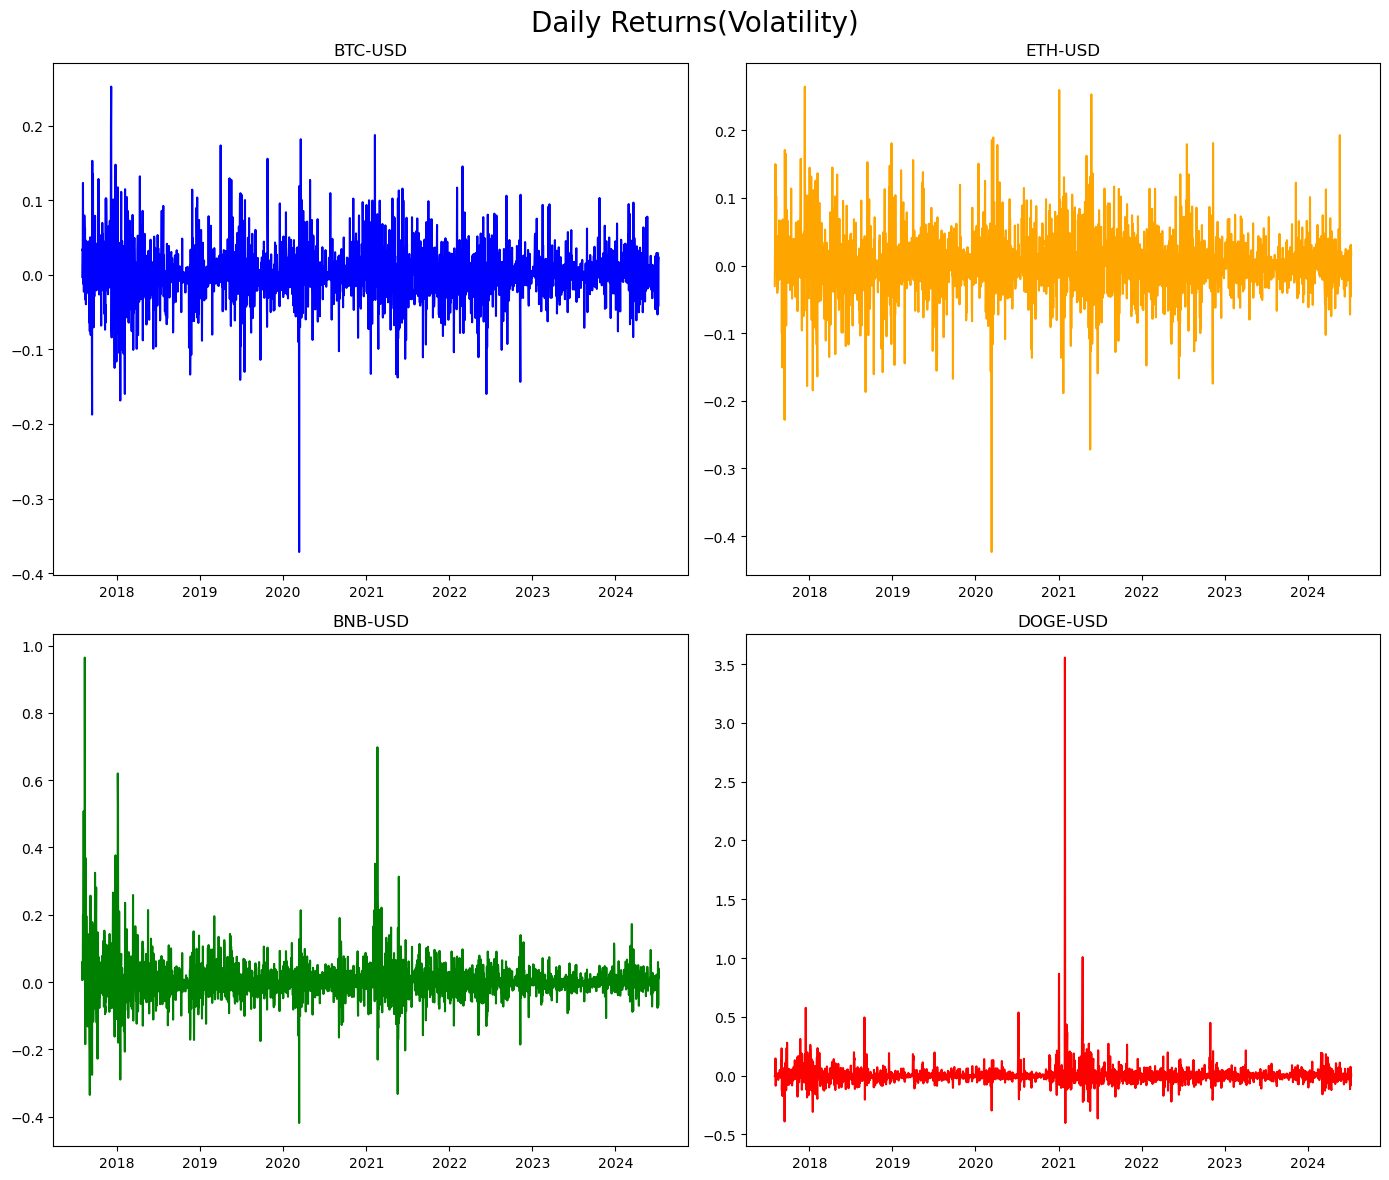

In [294]:
# define a list of colors for each cryptocurrency
colors = ['blue', 'orange', 'green', 'red']

# create 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# loop through the subplots and plot each cryptocurrency with a different color
for i, (name, col) in enumerate(daily_returns.iteritems()):
    row = i // 2
    col_idx = i % 2
    axs[row, col_idx].plot(col.index, col.values, color=colors[i])
    axs[row, col_idx].set_title(name)

#title
fig.suptitle('Daily Returns(Volatility)', fontsize=20)

plt.tight_layout()
plt.show()

Bitcoin (BTC-USD)
The blue graph for Bitcoin shows a range of fluctuations in daily returns, with spikes that do not generally exceed 0.2 or drop below -0.3. The density of fluctuations around the zero line suggests frequent, moderate volatility, with notable spikes during certain periods which could indicate market reactions to specific events or developments.

Ethereum (ETH-USD)
Ethereum's graph, depicted in yellow, shows a similar pattern to Bitcoin in terms of frequency and range of daily returns. However, the spikes seem slightly more pronounced, suggesting that Ethereum might experience slightly higher volatility compared to Bitcoin on a day-to-day basis.

Binance Coin (BNB-USD)
The green graph for Binance Coin indicates a generally lower level of day-to-day volatility compared to Bitcoin and Ethereum, with fewer extreme spikes. However, there are a few notable exceptions, including some sharp peaks that suggest occasional significant price movements. This could be due to market news, investor reactions, or changes within the Binance ecosystem itself.

Dogecoin (DOGE-USD)
Dogecoin's red graph shows the most dramatic volatility among the four, with numerous sharp spikes in both positive and negative directions. This reflects Dogecoin’s reputation for high volatility, often driven by social media influences, celebrity endorsements, or broader market speculation.

All four cryptocurrencies exhibit volatility, which is characteristic of digital asset markets known for rapid price movements and speculative trading.

The intensity and frequency of the spikes vary between each cryptocurrency, highlighting their different market behaviors and investor communities.

Dogecoin and Ethereum, in particular, show higher peaks in volatility, indicating more extreme percentage changes in daily returns compared to Bitcoin and Binance Coin.

This analysis of daily returns illustrates the risk profiles and market dynamics associated with each  cryptocurrency, providing insights into their stability and the nature of their trading environments.

## Distribution of the Daily Returns

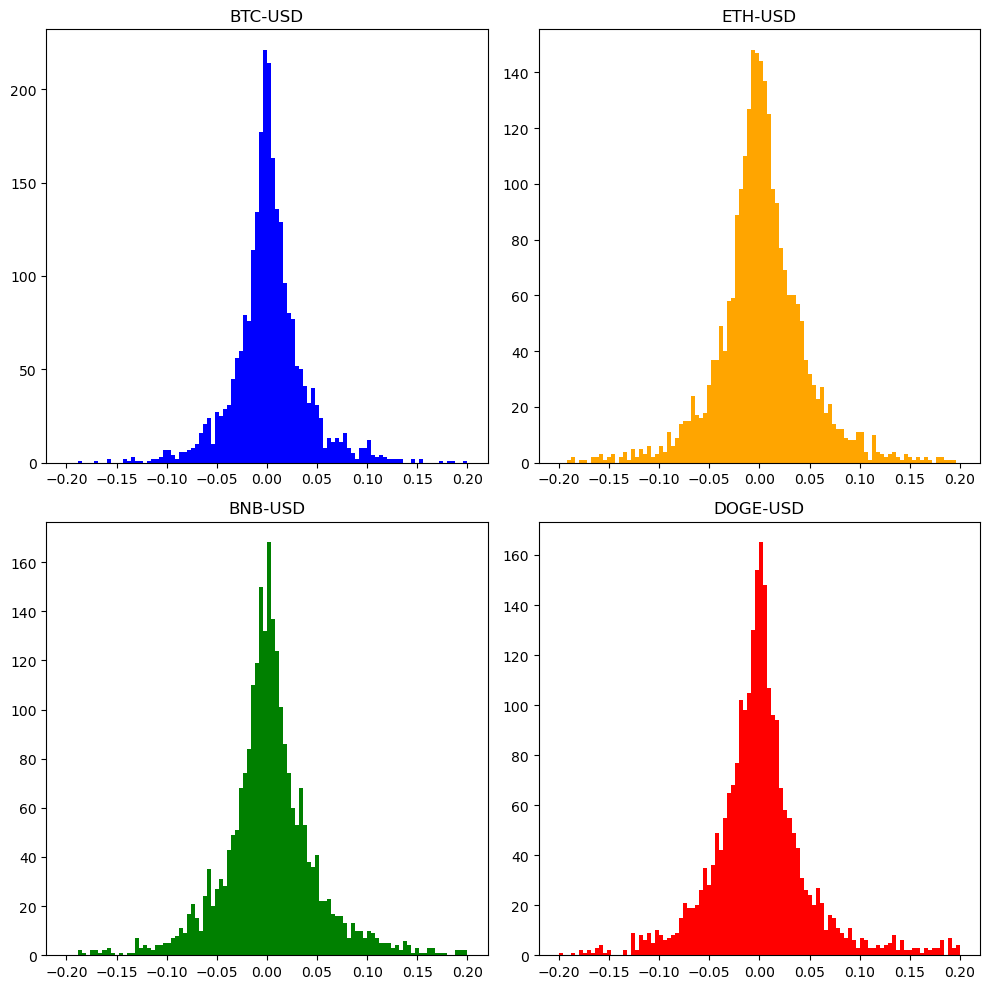

In [295]:
# define a list of colors for each cryptocurrency
colors = ['blue', 'orange', 'green', 'red']

# create a 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# loop through the subplots and plot a histogram of the data
for i, (name, col) in enumerate(daily_returns.iteritems()):
    row = i // 2
    col_idx = i % 2
    axs[row, col_idx].hist(col, range=(-0.2, 0.2), bins=100, color=colors[i])
    axs[row, col_idx].set_title(name)

plt.tight_layout()
plt.show()


In [296]:
#Show the candleticks
fig = go.Figure(data=[go.Candlestick(
    x = bitcoin_data_df.index,
    open = bitcoin_data_df['Open'],
    close = bitcoin_data_df['Close'],
    high = bitcoin_data_df['High'],
    low = bitcoin_data_df['Low'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red',
)])
fig.update_layout(title='Bitcoin Candlestick Chart')
fig.show()

In [297]:
# filter the data for 2021 as I see that in this time the price fluctuate more.
bitcoin_data_df_2021 = bitcoin_data_df.loc['2021']

fig = go.Figure(data=[go.Candlestick(
    x = bitcoin_data_df_2021.index,
    open = bitcoin_data_df_2021['Open'],
    close = bitcoin_data_df_2021['Close'],
    high = bitcoin_data_df_2021['High'],
    low = bitcoin_data_df_2021['Low'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red',
)])
fig.update_layout(title='Bitcoin Candlestick Chart - 2021')
fig.show()

In [298]:
#Candleticks
fig = go.Figure(data=[go.Candlestick(
    x = ethereum_data_df.index,
    open = ethereum_data_df['Open'],
    close = ethereum_data_df['Close'],
    high = ethereum_data_df['High'],
    low = ethereum_data_df['Low'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red',
)])
fig.update_layout(title='Ethereum Candlestick Chart')
fig.show()

In [299]:
#Candleticks
fig = go.Figure(data=[go.Candlestick(
    x = bnb_data_df.index,
    open = bnb_data_df['Open'],
    close = bnb_data_df['Close'],
    high = bnb_data_df['High'],
    low = bnb_data_df['Low'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red',
)])
fig.update_layout(title='BNB Candlestick Chart')
fig.show()

In [300]:
#Candleticks
fig = go.Figure(data=[go.Candlestick(
    x = dogecoin_data_df.index,
    open = dogecoin_data_df['Open'],
    close = dogecoin_data_df['Close'],
    high = dogecoin_data_df['High'],
    low = dogecoin_data_df['Low'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red',
)])
fig.update_layout(title='Dogecoin Candlestick Chart')
fig.show()

## Outliers

In [301]:
daily_returns.iplot(kind='box',title='Boxplot Daily Returns')

The boxplot summarizes the minimum, maximum, median, and quartiles of the distribution of daily returns. It can help to identify the center and the spread of the distribution, as well as the presence of outliers.

If the box in the boxplot is closer to the bottom, it indicates that the distribution of returns is negatively skewed, with more low returns than high returns. If the box is closer to the top, it suggests that the distribution is positively skewed, with more high returns than low returns.

Dogecoin and BNB their boxplot are closer to the bottom, which indicates that the distribution of returns is negatively skewed, with more low returns than high returns.

Bitcoin and Ethereum their boxplot are closer to the top, which suggests that the distribution is positively skewed, with more high returns than low returns.

The length of the box can provide information on the degree of variation in the data, with a longer box indicating more variability in returns.

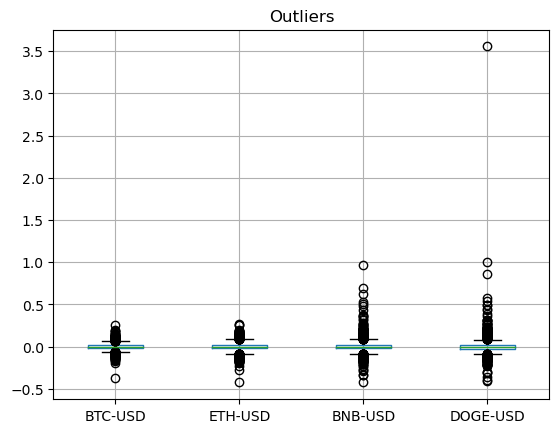

In [302]:
daily_returns.boxplot()
plt.title('Outliers')
plt.show()

## Correlations

In [303]:
daily_returns.corr()

BTC-USD   ETH-USD   BNB-USD  DOGE-USD
BTC-USD   1.000000  0.771376  0.564062  0.386051
ETH-USD   0.771376  1.000000  0.548271  0.361220
BNB-USD   0.564062  0.548271  1.000000  0.244234
DOGE-USD  0.386051  0.361220  0.244234  1.000000

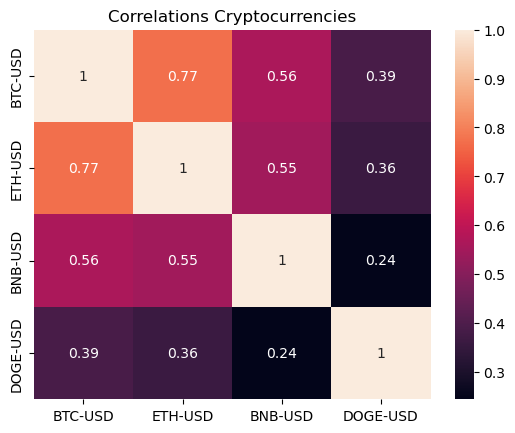

In [304]:
sns.heatmap(daily_returns.corr(),annot=True)
plt.title("Correlations Cryptocurrencies")
plt.show()

The heatmap represents the correlations in daily returns among the four cryptocurrencies: The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and values close to 0 suggest no correlation.

Bitcoin (BTC-USD) and Ethereum (ETH-USD): 0.77
This shows a strong positive correlation, indicating that the daily price movements of Bitcoin and Ethereum often move in tandem.

Bitcoin (BTC-USD) and Binance Coin (BNB-USD): 0.56
There's a moderate positive correlation between Bitcoin and Binance Coin, suggesting that their daily returns somewhat move together, though not as strongly as Bitcoin and Ethereum.

Bitcoin (BTC-USD) and Dogecoin (DOGE-USD): 0.39
This indicates a weaker positive correlation compared to other pairs, suggesting that while there is some tendency for Bitcoin and Dogecoin to move in the same direction on a daily basis, it is less consistent.

Ethereum (ETH-USD) and Binance Coin (BNB-USD): 0.55
Ethereum and Binance Coin have a moderate positive correlation, indicating that their daily returns are somewhat aligned.

Ethereum (ETH-USD) and Dogecoin (DOGE-USD): 0.36
This represents a weak positive correlation, suggesting that the daily returns of Ethereum and Dogecoin occasionally move together, but the relationship is not strong.

Binance Coin (BNB-USD) and Dogecoin (DOGE-USD): 0.24
This shows a very weak positive correlation, the lowest among the pairs, indicating that the daily returns of BNB and DOGE have the least tendency to move in the same direction compared to other pairs.

These correlations can help investors understand how the movements of these cryptocurrencies relate to each other, which is useful for diversifying a portfolio or for developing trading strategies based on the behavior of one currency relative to another.

## Calculate the RSI

In [305]:
# Define period for RSI calculation
rsi_period = 14

# Calculate the difference between each price and the previous price
delta = bitcoin_data_df['Close'].diff()

# Get rid of the first row, which is NaN
delta = delta[1:]

# Define up and down values
up = delta.copy()
down = delta.copy()

# Set up values to be positive and down values to be negative
up[up < 0] = 0
down[down > 0] = 0

# Calculate the average gain and loss
avg_gain = up.rolling(window=rsi_period).mean()
avg_loss = abs(down.rolling(window=rsi_period).mean())

# Calculate the Relative Strength (RS)
rs = avg_gain / avg_loss

# Calculate the RSI
rsi = 100.0 - (100.0 / (1.0 + rs))
rsi

Date
2013-04-29          NaN
2013-04-30          NaN
2013-05-01          NaN
2013-05-02          NaN
2013-05-03          NaN
                ...    
2024-07-05    28.701788
2024-07-06    34.292184
2024-07-07    31.958723
2024-07-08    40.224532
2024-07-09    39.485647
Name: Close, Length: 4090, dtype: float64

In [306]:
# Create and calculate the 30 day simple moving average
SMA30 = bitcoin_data_df['Close'].rolling(window=30).mean()
bitcoin_data_df['SMA30'] = SMA30

<AxesSubplot:xlabel='Date'>

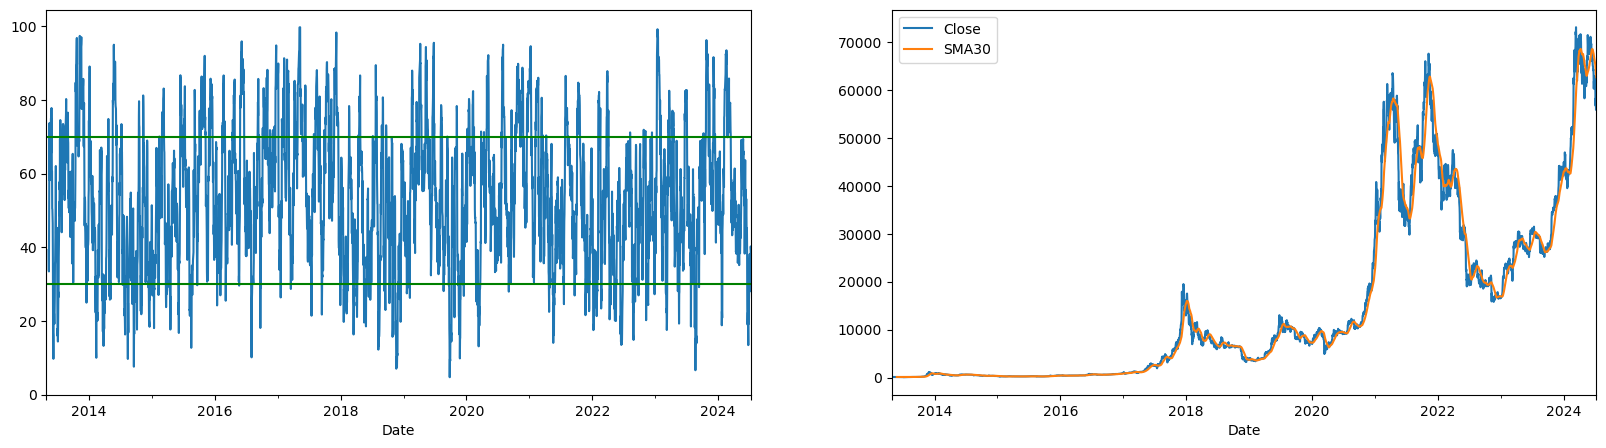

In [307]:
# Show the rsi and SMA
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax0 = rsi.plot(ax=ax[0])
ax0.axhline(30, color='green')
ax0.axhline(70, color='green')
# Plot the SMA
bitcoin_data_df[['Close', 'SMA30']].plot(ax=ax[1])

The RSI period is set to 14, which is a common value used in technical analysis.

The code first calculates the difference between each closing price and the previous closing price, and then splits the difference into up and down values based on whether the price went up or down. It then calculates the average gain and loss over the RSI period, and uses these values to calculate the Relative Strength (RS). Finally, it uses the RS value to calculate the RSI

When the RSI value is above 70, it indicates that Bitcoin may be overbought and due for a price correction. When the RSI value is below 30, it indicates that Bitcoin may be oversold and due for a price increase.

The RSI indicator is widely used in technical analysis to identify potential price trend reversals and to help traders make buy and sell decisions.